# Projectile Motion

## Introduction
In this notebook, we will explore [Projectile Motion](https://en.wikipedia.org/wiki/Projectile_motion).

We will first consider objects that are moving under the influence of some initial velocity and the downward pull of gravity, like a ball thrown by a person or a cannonball shot from a cannon. 

The [gravitaional acceleration](https://en.wikipedia.org/wiki/Gravitational_acceleration) of the object is denoted with the letter $g$ and determines how quickly the velocity in the vertical direction will change. On Earth's surface, the graviational accceleration is $g_{\oplus} = 9.8 \text{ m}\text{/s}^2$.

For now we will only consider two dimensions, $x$ (horizontal) and $y$ (vertical). The equations that determine the objects trajectory can be separated into it's $x$ and $y$ components. If the particle has initial position $(x_0, y_0)$ with initial velocity $(v_{x_0}, v_{y_0})$, then the equations for it's motion are:

acceleration:<br/>
$\mathbf{a} = (a_x, a_y)$ <br/>
where $a_x = 0$, because there is no acceleration in the $x$ direction and $a_y = g$ (where we will take $g$ to be negative since we'll consider the 'down' direction to be when the $y$ values are lesser).

velocity:<br/>
$\mathbf{v} = (v_x, v_y)$ <br/>
where $v_x = v_{x_0}$ and $v_y = v_{y_0} + g t$. We can see that the velocity in the $x$ direction is not changing and remains at the initial value for all times, while the $y$ value will change with time and will increase in the downward direction. 

position:<br/>
$\mathbf{p} = (x, y)$ <br/>
where $x = x_0 + v_x t$ and $y = y_0 + v_{y_0} t + \frac{1}{2} g t^2$.

In [1]:
# These are common scieintific computing libraries that we will use for 
# numerical computaions and plotting. See the documentation and tutorials for more info

# Python tutorial https://docs.python.org/3/tutorial/
# Numpy tutorial https://numpy.org/devdocs/user/quickstart.html
# Pyplot tutorial https://matplotlib.org/tutorials/introductory/pyplot.html

import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
This function will plot the motion of a projectile in 2D space under the influence of gravity.
Arguments:
    - init_pos: tuple representing the particle's initial position (inital x position, initial y position)
    - init_vel: tuple representing the particle's initial velocity (inital x valocity, initial y velocity)
    - g: gravitational acceleartion (assumed in the y direction, in meters per second squared)
    - time: total time to plot (in seconds)
    - timestep: size of timestep to use (default is 1 millisecond)
Return values:
    - x, y: numpy arrays of the x and y position as a function of time with an entry for each time step in the 
            whole time interval.
'''
def plot_projectile_motion(init_pos=(0,0), init_vel=(10,10), g=-9.8, time=5, timestep=0.001):
    x0 = init_pos[0]
    y0 = init_pos[1]
    vel_x0 = init_vel[0]
    vel_y0 = init_vel[1]
    
    # get list of times:
    t = np.linspace(0, time, num=time/timestep)
    
    # get list of x positions (noting that there are no accelertions acting on the particle in the x direction)
    x = x0 + vel_x0 * t
    
    # Get list of y positions
    y = y0 + vel_y0 * t + 0.5 * g * t**2
    # For now don't let projectile sink below the ground (y=0)
    y = np.where(y > 0, y, 0)
    
    plt.plot(x, y, "r-")
    plt.title('Projectile Trajectory')
    plt.xlabel('x position (meters)')
    plt.ylabel('y position (meters)')
    plt.show()
    return x, y 

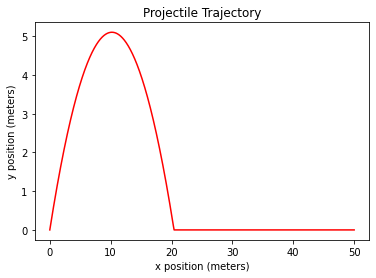

In [3]:
x, y = plot_projectile_motion()

In [4]:
'''
This function will plot the motion of a projectile in 2D space under the influence of gravity.
Arguments:
    - init_pos: tuple representing the particle's initial position (inital x position, initial y position)
    - init_vel: tuple representing the particle's initial velocity (inital x valocity, initial y velocity)
    - g: gravitational acceleartion (assumed in the y direction, in meters per second squared)
    - time: total time to plot (in seconds)
    - timestep: size of timestep to use (default is 1 millisecond)
    - deflection_efficiency: the 'bounce factor' which is the ratio of how much of it's 
                            velocity the particle retains when it deflects off the ground
Return values:
    - x, y: numpy arrays of the x and y position as a function of time with an entry for each time step in the 
            whole time interval.
'''
def plot_projectile_motion_bouncing(init_pos=(0,0), init_vel=(10,10), g=-9.8, time=5, timestep=0.001, deflection_efficiency=0.5):
    x0 = init_pos[0]
    y0 = init_pos[1]
    vel_x0 = init_vel[0]
    vel_y0 = init_vel[1]
    
    # get list of times:
    t = np.linspace(0, time, num=time/timestep)
    
    # get list of x positions (noting that there are no accelertions acting on the particle in the x direction)
    x = x0 + vel_x0 * t
    
    y = []
    vel_y = []
    yt = y0
    vel_yt = vel_y0
    for i in range(t.shape[0]):
        y.append(yt)
        vel_yt = vel_yt + g * timestep
        yt = max(yt + vel_yt * timestep, 0.0)
        if yt == 0:
            vel_yt *= -deflection_efficiency
    y = np.array(y)
    
    plt.plot(x, y, "r-")
    plt.title('Projectile Trajectory')
    plt.xlabel('x position (meters)')
    plt.ylabel('y position (meters)')
    plt.show()
    return x, y 

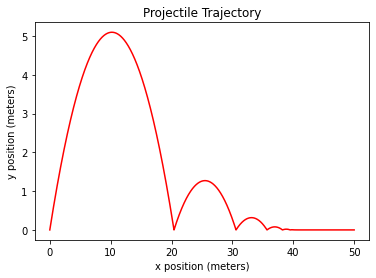

In [5]:
x, y = plot_projectile_motion_bouncing()